In [1]:
from pybedtools import BedTool
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (14, 8)

In [4]:
bam_dir = '../bam'

In [5]:
def analyze_coverage(bam_file, target_regions):
    bam = BedTool(bam_file)
    cov = target_regions.coverage(bam, d=True).to_dataframe()
    
    print(bam_file, '\n========================================')
    print('Number of bases in target regions covered:', len(cov.query('score > 0')))
    print('Fraction of target regions covered:', (cov.score > 0).mean() * 100, '%')
    print('\nSummary of coverage at sites in target regions:\n')
    print(cov.score.describe())
    
    plt.hist(cov.score, bins=cov.score.max())
    plt.tick_params(labelsize=15)
    plt.xlabel('coverage', fontsize=20)
    plt.ylabel('counts', fontsize=20)
    plt.xlim(0, 50)
    
def plot_regions(lengths):
    lengths.plot(kind='hist', bins=50)
    plt.tick_params(labelsize=15)
    plt.xlabel('region size [bp]', fontsize=20)
    plt.ylabel('count', fontsize=20)
    plt.xlim(0, 4000)

## Characteristics of Lippold et al's capture design

### Without Heng Li's 35bp 50% filter

### Number of regions

In [6]:
lippold_regions = BedTool('/mnt/454/Carbon_beast_QM/QF_chrY_region.bed')
len(lippold_regions)

1251

### Total length of target regions

In [7]:
lippold_regions.total_coverage()

573657

### Size distribution of target regions (all numbers in bp)

In [8]:
lengths = pd.Series(i.length for i in lippold_regions)

In [9]:
lengths.describe()

count    1251.000000
mean      458.558753
std       474.844826
min        60.000000
25%       119.000000
50%       151.000000
75%       820.000000
max      3899.000000
dtype: float64

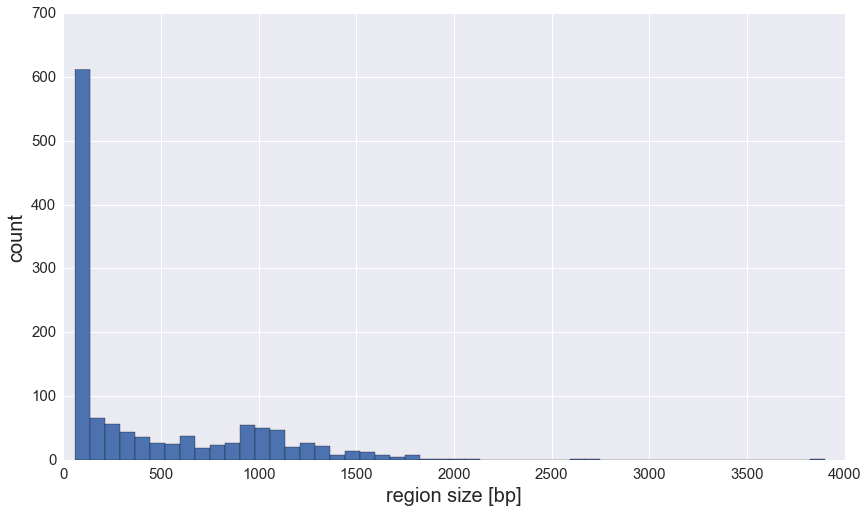

In [10]:
plot_regions(lengths)

### With Heng Li's 35bp 50% filter

### Number of regions

In [11]:
lippold_regions = BedTool('../input/lippold_regions.bed')
len(lippold_regions)

1779

### Total length of target regions

In [12]:
lippold_regions.total_coverage()

556259

### Size distribution of target regions (all numbers in bp)

In [13]:
lengths = pd.Series(i.length for i in lippold_regions)

In [14]:
lengths.describe()

count    1779.000000
mean      312.680720
std       361.577627
min         1.000000
25%       107.500000
50%       119.000000
75%       418.500000
max      2829.000000
dtype: float64

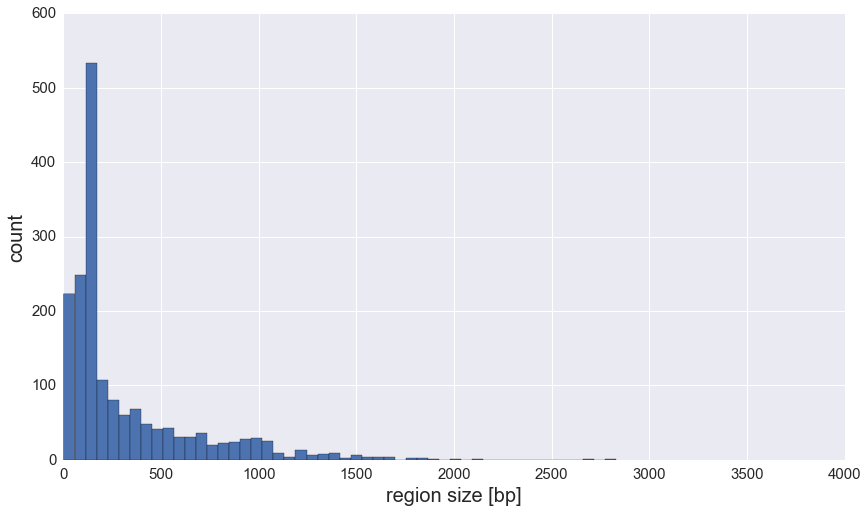

In [15]:
plot_regions(lengths)

## Characteristics of Y chromosome exome regions from Mendez et al. 2016

### Number of regions

In [16]:
exome_regions = BedTool('../input/exome_regions.bed')
len(exome_regions)

2519

### Total length of target regions

In [17]:
exome_regions.total_coverage()

118643

### Size distribution of target regions (all numbers in bp)

In [18]:
lengths = pd.Series(i.length for i in exome_regions)

In [19]:
lengths.describe()

count    2519.000000
mean       47.099246
std        88.273258
min         1.000000
25%         1.000000
50%         3.000000
75%        67.500000
max      1257.000000
dtype: float64

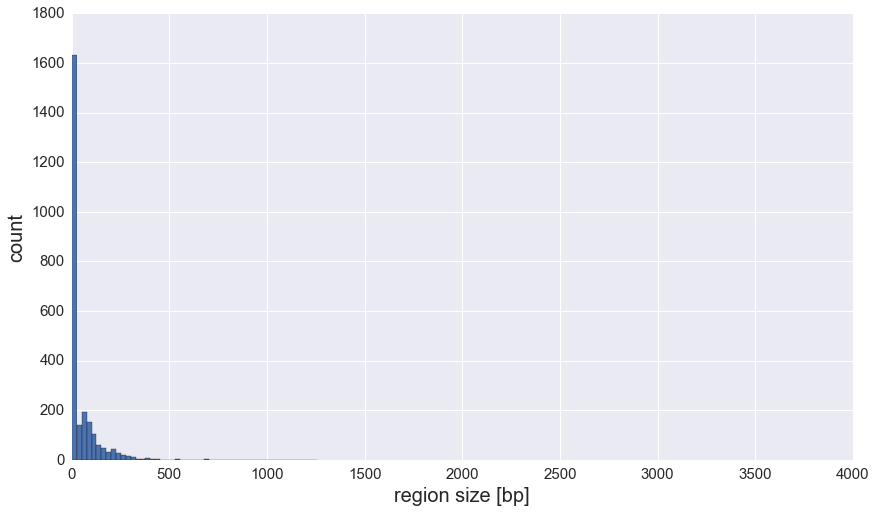

In [20]:
plot_regions(lengths)

# Overlap of Lippold et al. and exome regions

In [21]:
lippold_regions.intersect(exome_regions).total_coverage()

18955

# El Sidron 570kb capture

## Proportion of on-target reads

In [22]:
on = ! samtools view ../bam/lippold_sidron.bam | wc -l
total = ! samtools view ../tmp/sidron_rmdup_len35mapq37_sorted.bam | wc -l

print('on-target read count: ', on[0])
print('total read count: ', total[0])
print(int(on[0]) / int(total[0]) * 100, '%')

on-target read count:  92183
total read count:  244170
37.75361428512921 %


../bam/lippold_sidron.bam 
Number of bases in target regions covered: 533012
Fraction of target regions covered: 95.8208316629 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          8.473907
std           5.485250
min           0.000000
25%           4.000000
50%           8.000000
75%          12.000000
max          53.000000
Name: score, dtype: float64


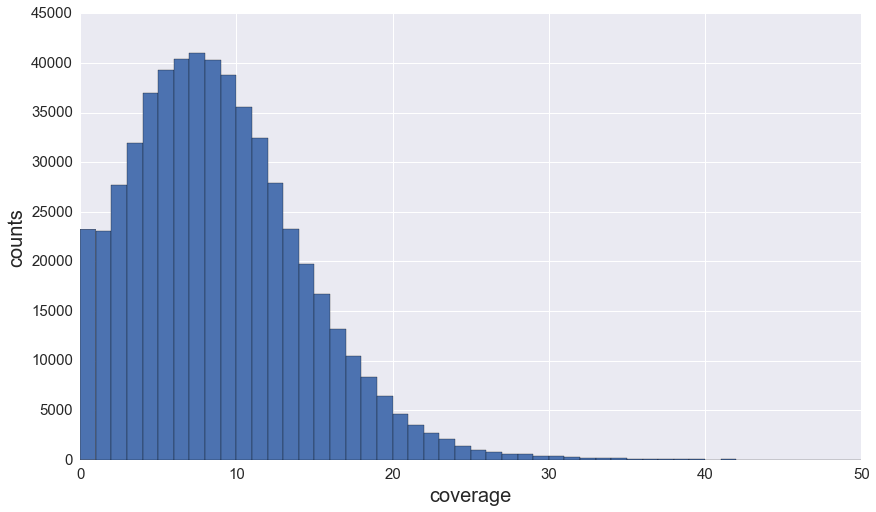

In [23]:
analyze_coverage('../bam/lippold_sidron.bam', lippold_regions)

# El Sidron exome capture

../bam/exome_sidron.bam 
Number of bases in target regions covered: 107664
Fraction of target regions covered: 90.7461881443 %

Summary of coverage at sites in target regions:

count    118643.000000
mean          3.280994
std           3.002870
min           0.000000
25%           1.000000
50%           2.000000
75%           5.000000
max          20.000000
Name: score, dtype: float64


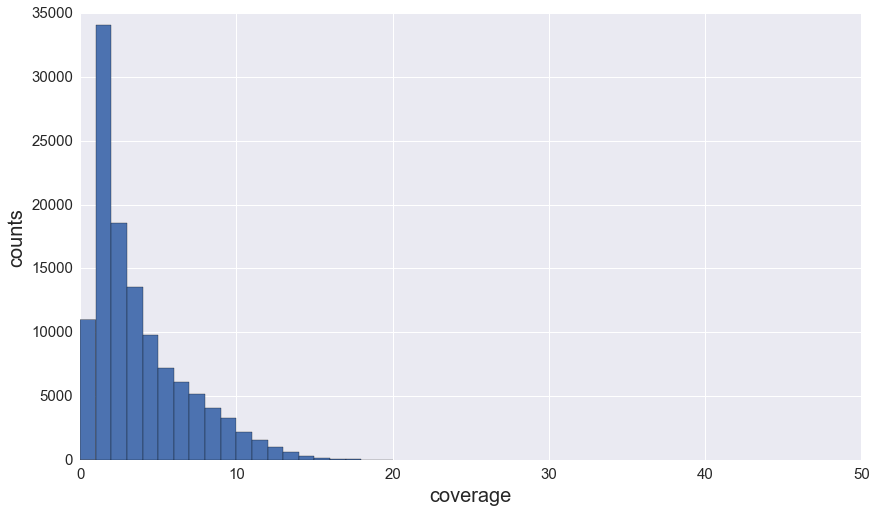

In [24]:
analyze_coverage('../bam/exome_sidron.bam', exome_regions)

# Mezmaiskaya 2

## Proportion of on-target reads

In [25]:
read_count = ! samtools view ../bam/lippold_mez2.bam | wc -l

print('on-target read count: ', read_count[0])

on-target read count:  11216


../bam/lippold_mez2.bam 
Number of bases in target regions covered: 317820
Fraction of target regions covered: 57.1352553397 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          0.904900
std           1.008025
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: score, dtype: float64


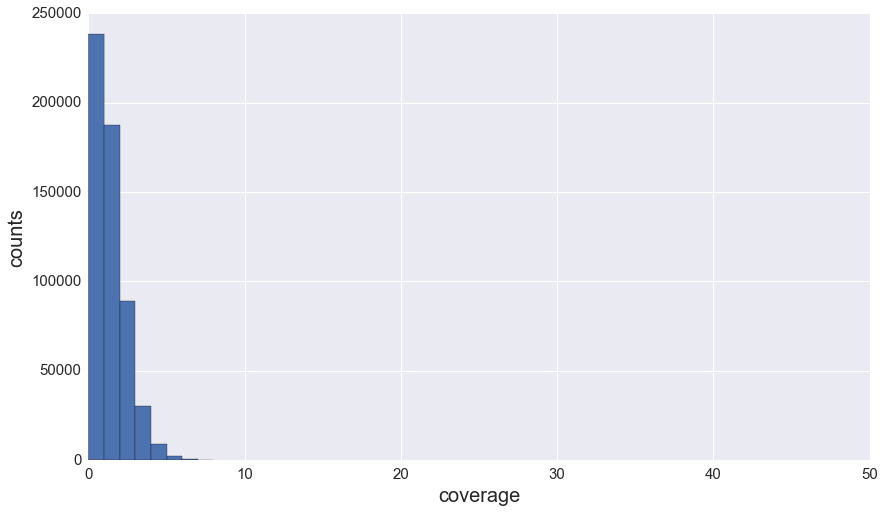

In [26]:
analyze_coverage('../bam/lippold_mez2.bam', lippold_regions)

# Spy

## Proportion of on-target reads

In [27]:
read_count = ! samtools view ../bam/lippold_spy.bam | wc -l

print('on-target read count: ', read_count[0])

on-target read count:  6404


../bam/lippold_spy.bam 
Number of bases in target regions covered: 203441
Fraction of target regions covered: 36.5730711773 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          0.476693
std           0.726889
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           7.000000
Name: score, dtype: float64


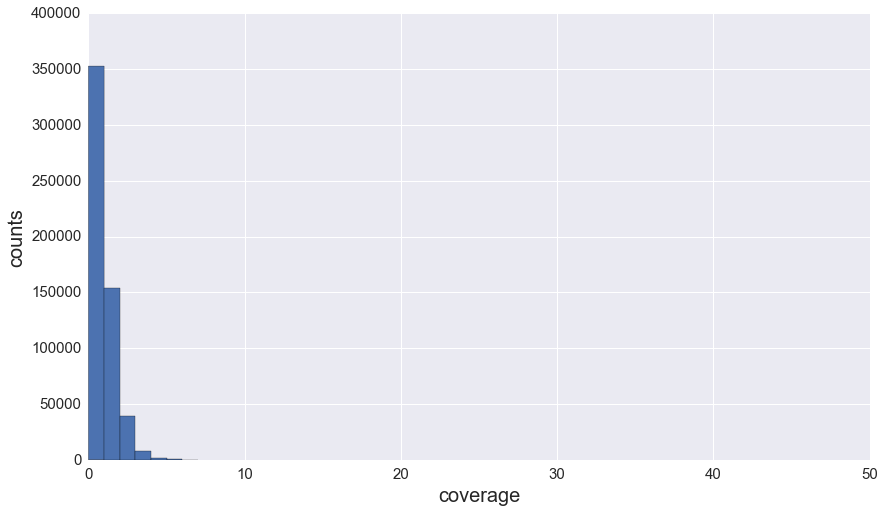

In [28]:
analyze_coverage('../bam/lippold_spy.bam', lippold_regions)

# merged A00 Y chromosome data

../bam/lippold_a00.bam 
Number of bases in target regions covered: 556258
Fraction of target regions covered: 99.9998202276 %

Summary of coverage at sites in target regions:

count    556259.000000
mean         21.787211
std           6.368136
min           0.000000
25%          17.000000
50%          21.000000
75%          26.000000
max         106.000000
Name: score, dtype: float64


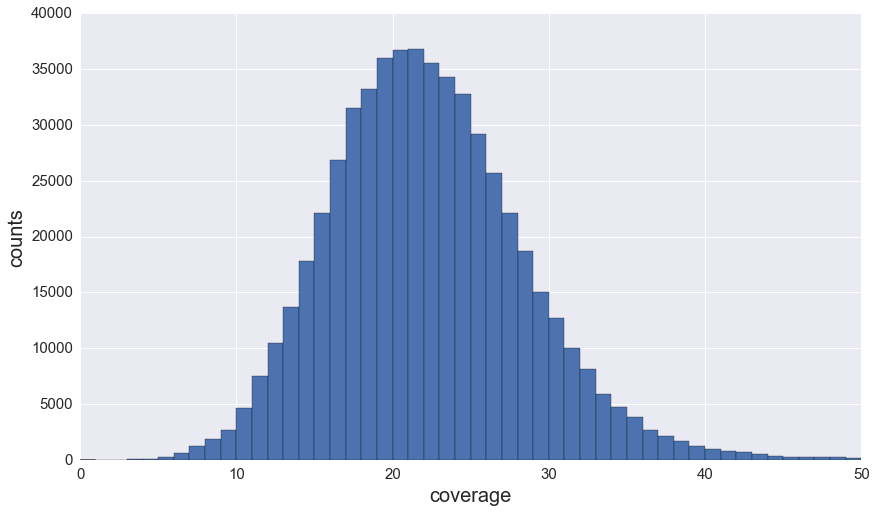

In [29]:
analyze_coverage('../bam/lippold_a00.bam', lippold_regions)

# A00 Y chromosome data -- GRC13292545

In [30]:
# analyze_coverage('../bam/lippold_a00_1.bam', lippold_regions)

# A00 Y chromosome data -- GRC13292546

In [31]:
# analyze_coverage('../bam/lippold_a00_2.bam', lippold_regions)

<br><br><br><br><br><br><br><br><br><br>
# Denisova 8 shotgun (all fragments)

In [32]:
read_count = ! samtools view ../bam/lippold_den8.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  557


../bam/lippold_den8.bam 
Number of bases in target regions covered: 21784
Fraction of target regions covered: 3.91616135649 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          0.041292
std           0.209793
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: score, dtype: float64


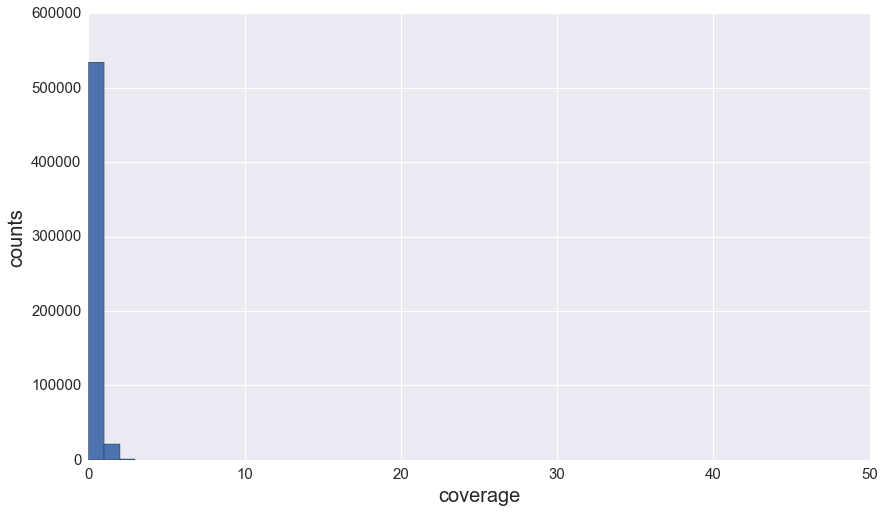

In [33]:
analyze_coverage('../bam/lippold_den8.bam', lippold_regions)

# Denisova 8 shotgun (damaged fragments only)

In [34]:
read_count = ! samtools view ../bam/lippold_deam_den8.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  101


../bam/lippold_deam_den8.bam 
Number of bases in target regions covered: 4145
Fraction of target regions covered: 0.745156482861 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          0.007452
std           0.086000
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


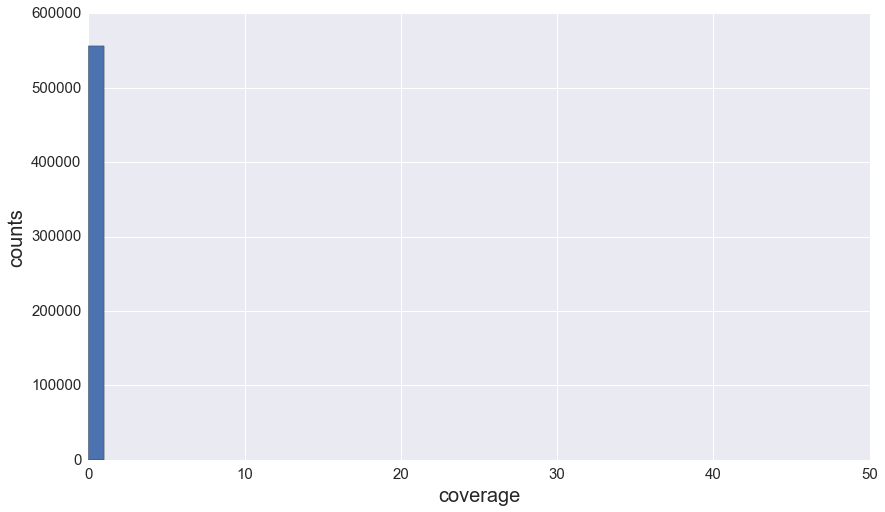

In [35]:
analyze_coverage('../bam/lippold_deam_den8.bam', lippold_regions)

# Denisova 4 shotgun (all fragments)

In [36]:
read_count = ! samtools view ../bam/lippold_den4.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  76


../bam/lippold_den4.bam 
Number of bases in target regions covered: 4041
Fraction of target regions covered: 0.72646015615 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          0.007405
std           0.087352
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: score, dtype: float64


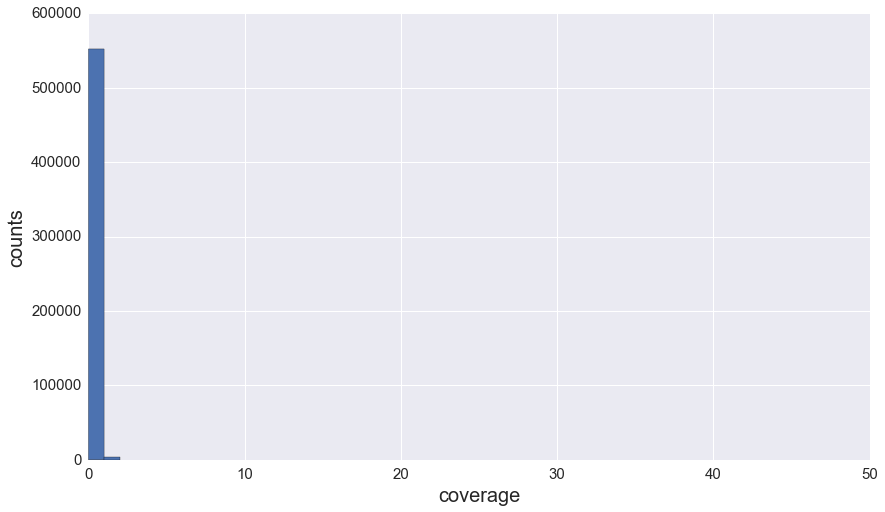

In [37]:
analyze_coverage('../bam/lippold_den4.bam', lippold_regions)

# Denisova 4 shotgun (damaged fragments only)

In [38]:
read_count = ! samtools view ../bam/lippold_deam_den4.bam | wc -l
print('Number of reads: ', read_count[0])

Number of reads:  3


../bam/lippold_deam_den4.bam 
Number of bases in target regions covered: 156
Fraction of target regions covered: 0.0280444900667 %

Summary of coverage at sites in target regions:

count    556259.000000
mean          0.000280
std           0.016744
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: score, dtype: float64


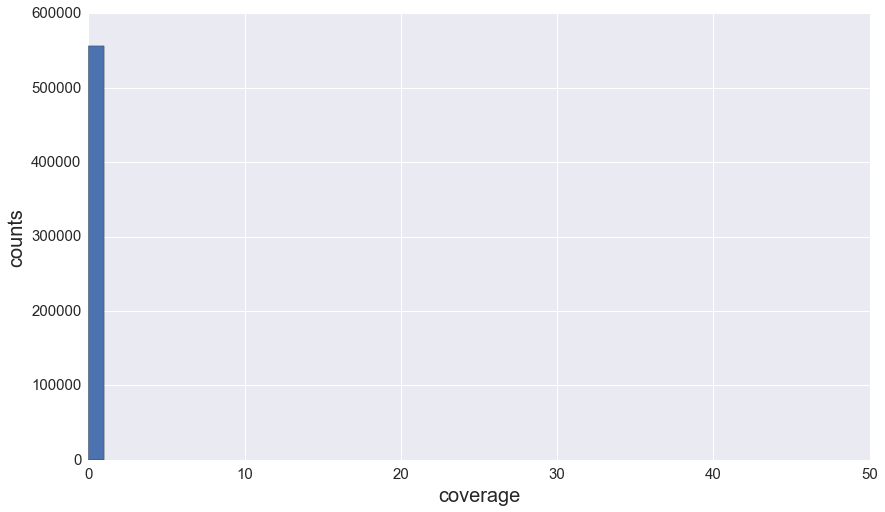

In [39]:
analyze_coverage('../bam/lippold_deam_den4.bam', lippold_regions)

## Overlap of exome capture regions and regions from Lippold et al paper

In [40]:
exome = BedTool('../input/exome_regions.bed')
lippold = BedTool('../input/lippold_regions.bed')

In [41]:
exome.total_coverage()

118643

In [42]:
lippold.total_coverage()

556259

In [43]:
exome.intersect(lippold).total_coverage()

18955